In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [6]:
df= pd.read_csv('/content/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

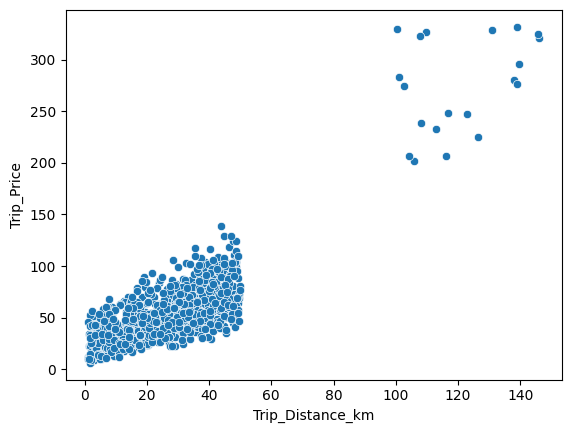

In [8]:
sns.scatterplot(x="Trip_Distance_km", y="Trip_Price", data=df)

In [9]:
df.shape

(1000, 11)

In [10]:
df["Trip_Distance_km"].count()

950

In [11]:
df["Trip_Distance_km"].mean()

27.070546861761322

In [12]:
df["Trip_Distance_km"].median()

25.83

In [13]:
df["Trip_Distance_km"].mode()

,Trip_Distance_km
0,3.00
1,3.22
2,9.91
3,10.14
4,13.64
5,25.63
6,31.29
7,32.04


In [14]:
Q1=df["Trip_Distance_km"].quantile(0.25)
Q3=df["Trip_Distance_km"].quantile(0.75)
IQR=Q3-Q1
IQR

25.7725

In [15]:
df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median(),inplace=True)

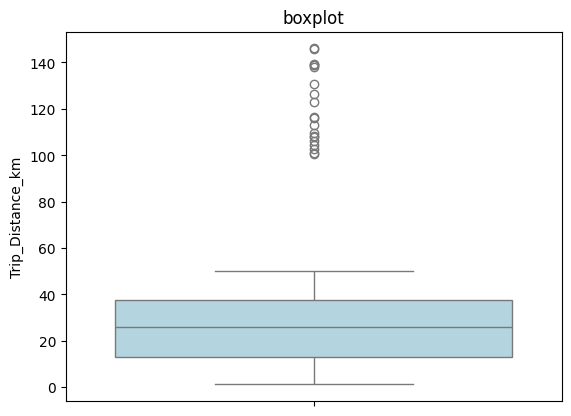

In [16]:
sns.boxplot(data=df["Trip_Distance_km"],color="lightblue")
plt.title("boxplot")
plt.show()

In [17]:
Q1=df["Trip_Distance_km"].quantile(0.25)
Q3=df["Trip_Distance_km"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower bond : {lower_bound} \nUpper bond : {upper_bound}")

lower bond : -23.904999999999994 
Upper bond : 74.79499999999999


In [18]:
df[df["Trip_Distance_km"]<= upper_bound]["Trip_Distance_km"].max()

49.99

In [19]:
df["Trip_Distance_km"]=df["Trip_Distance_km"].apply(lambda x:25.83 if x > upper_bound else x)

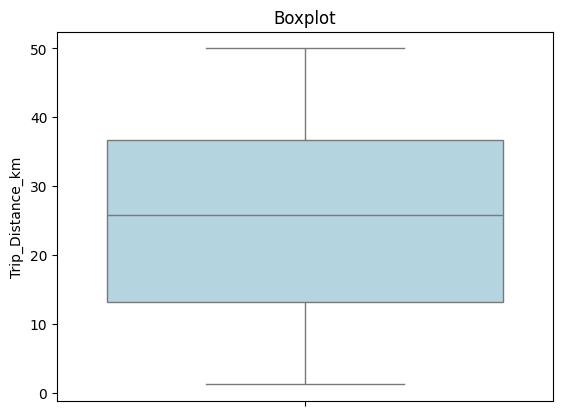

In [20]:
sns.boxplot(data=df['Trip_Distance_km'], color='lightblue')
plt.title('Boxplot')
plt.show()


In [21]:
 df['Trip_Price'].count()

951

In [22]:
df['Trip_Price'].mean()

56.87477332571041

In [23]:
df['Trip_Price'].median()

50.07450000000001

In [24]:
df['Trip_Price'].mode()

,Trip_Price
0,6.126900
1,6.472900
2,8.670900
3,8.729600
4,8.920300
...,...
946,325.098950
947,327.217665
948,328.871769
949,329.913004


In [25]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
IQR

35.356700000000004

In [26]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)

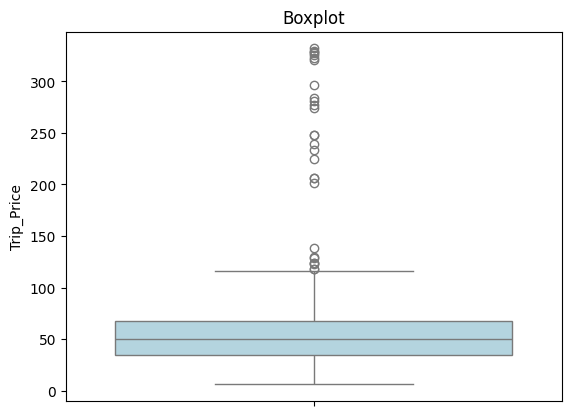

In [27]:
sns.boxplot(data=df['Trip_Price'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [28]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bond : {lower_bound} \nUpper Bond : {upper_bound}')

Lower Bond : -14.767850000000003 
Upper Bond : 116.82334999999999


In [29]:
df[df['Trip_Price'] <= upper_bound]['Trip_Price'].max()

116.42059999999998

In [30]:
df['Trip_Price'] = df['Trip_Price'].apply(lambda x: 50 if x > upper_bound else x)

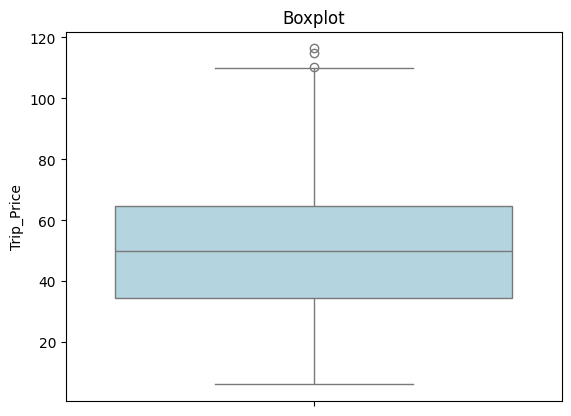

In [31]:
sns.boxplot(data=df['Trip_Price'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [35]:

scaler = StandardScaler()
df['Trip_Distance_km'] = scaler.fit_transform(df[['Trip_Distance_km']])
df['Trip_Price'] = scaler.fit_transform(df[['Trip_Price']])

In [36]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test,y_pred)

In [42]:
mse

0.5733235297451363

In [43]:
np.sqrt(mse)

0.7571813057287774

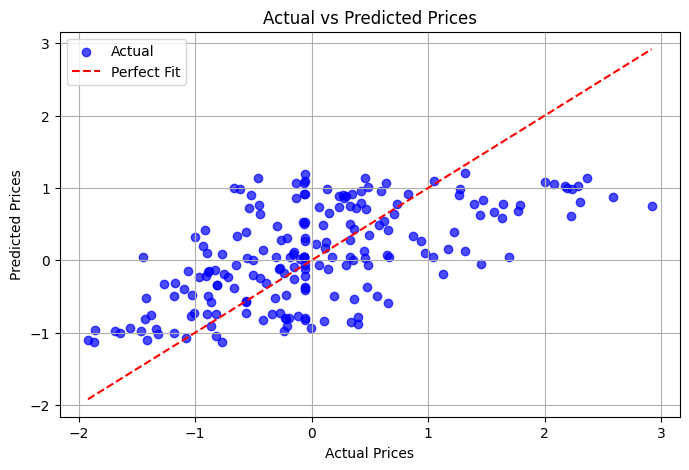

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 0.01
Coefficient: 0.67


In [46]:
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 0.01
Coefficient: 0.67
